In [3]:
# Library Imports and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib as mpl
import math
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ttest_ind, mannwhitneyu, norm, normaltest, shapiro, anderson
import operator
from IPython.display import HTML, display

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import time
st = time.time()

In [4]:
# Data Loading and Initial Exploration
drugdata = pd.read_csv("drug_consumption.csv")
drugdata.head()
drugdata.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness to experience', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation seeking', 'Alcohol consumption', 'Amphetamines consumption', 'Amyl nitrite consumption', 'Benzodiazepine consumption', 'Caffeine consumption', 'Cannabis consumption', 'Chocolate consumption', 'Cocaine consumption', 'Crack consumption', 'Ecstasy consumption', 'Heroin consumption', 'Ketamine consumption', 'Legal highs consumption', 'Lysergic acid diethylamide consumption', 'Methadone consumption', 'Magic mushrooms consumption', 'Nicotine consumption', 'Fictitious drug Semeron consumption', 'VSA']
demographic_columns = [
    'Age',
    'Gender',
    'Education',
    'Country',
    'Ethnicity',
]

personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

feature_columns = demographic_columns + personality_columns

drugs_columns = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'VSA'
]

drugs_legal = ['Alcohol consumption', 'Caffeine consumption', 'Chocolate consumption', 'Nicotine consumption']

drugs_illegal = [drug for drug in drugs_columns if drug not in drugs_legal]

all_columns = feature_columns + drugs_columns

Data Cleaning and Preprocessing

In [5]:
drugdata.dtypes
drugdata.shape

(1884, 32)

In [6]:
# Check for missing values
drugdata.isna().sum().sum()
# Fake results will be visualized and later removed
filtered_data = drugdata.query("`Fictitious drug Semeron consumption` != 'CL0'")
filtered_data

ID      Age   Gender  Education  Country  Ethnicity  Neuroticism  \
726    730 -0.07854  0.48246   -1.73790 -0.09765   -0.31685     -0.58016   
816    821 -0.95197 -0.48246   -0.61113 -0.09765   -0.50212     -0.67825   
1515  1520 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1532  1537 -0.95197  0.48246   -0.61113 -0.57009    0.11440     -0.46725   
1697  1702  0.49788  0.48246    0.45468 -0.57009   -0.31685      1.98437   
1768  1773 -0.95197 -0.48246   -1.22751 -0.57009   -0.22166     -0.34799   
1805  1810 -0.95197  0.48246   -1.43719 -0.57009   -0.31685      1.23461   
1822  1827 -0.95197  0.48246    0.45468 -0.57009   -0.31685      0.22393   

      Extraversion  Openness to experience  Agreeableness  ...  \
726        0.32197                 0.14143       -0.60633  ...   
816        1.74091                 0.72330        0.13136  ...   
1515      -0.80615                -1.27553       -1.34289  ...   
1532       0.80523                 0.29338        2.03972  ...   
1697      -0.80615                 2.15324        0.76096  ...   
1768       1.28610                 1.06238       -0.01729  ...   
1805       1.11406                 1.06238       -1.47955  ...   
1822      -0.30033                 0.88309        1.28610  ...   

      Ecstasy consumption  Heroin consumption  Ketamine consumption  \
726                   CL2                 CL2                   CL2   
816                   CL3                 CL0                   CL0   
1515                  CL1                 CL2                   CL1   
1532                  CL4                 CL0                   CL4   
1697                  CL2                 CL0                   CL2   
1768                  CL3                 CL0                   CL4   
1805                  CL4                 CL2                   CL1   
1822                  CL0                 CL0                   CL0   

     Legal highs consumption Lysergic acid diethylamide consumption  \
726                      CL0                                    CL4   
816                      CL0                                    CL5   
1515                     CL2                                    CL1   
1532                     CL3                                    CL2   
1697                     CL2                                    CL2   
1768                     CL3                                    CL6   
1805                     CL4                                    CL1   
1822                     CL2                                    CL3   

     Methadone consumption Magic mushrooms consumption Nicotine consumption  \
726                    CL2                         CL6                  CL6   
816                    CL0                         CL5                  CL4   
1515                   CL2                         CL4                  CL2   
1532                   CL0                         CL3                  CL4   
1697                   CL0                         CL2                  CL6   
1768                   CL3                         CL3                  CL3   
1805                   CL0                         CL1                  CL6   
1822                   CL0                         CL3                  CL5   

     Fictitious drug Semeron consumption  VSA  
726                                  CL2  CL2  
816                                  CL3  CL0  
1515                                 CL3  CL1  
1532                                 CL4  CL3  
1697                                 CL2  CL0  
1768                                 CL1  CL3  
1805                                 CL1  CL2  
1822                                 CL2  CL0  

[8 rows x 32 columns]

In [7]:
# We will drop overclaimers since, there answers might not truly be accurate
drugdata = drugdata.drop(drugdata[drugdata['Fictitious drug Semeron consumption'] != 'CL0'].index)

# We will also drop unnecesary columns
drugdata = drugdata.drop(['ID','Fictitious drug Semeron consumption'], axis=1)
drugdata = drugdata.reset_index(drop=True)

Encoding Drug Consumption Data

In [8]:
drugdata.describe()
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    elif x == 'CL6':
        return 6
    else:
        return 7

In [9]:
for column in drugs_columns:
  drugdata[column] = drugdata[column].apply(drug_encoder)
drugdata.head()

Age   Gender  Education  Country  Ethnicity  Neuroticism  Extraversion  \
0 -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825       1.93886   
1  0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725       0.80523   
2 -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882      -0.80615   
3  0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545      -1.63340   
4  2.59171  0.48246   -1.22751  0.24923   -0.31685     -0.67825      -0.30033   

   Openness to experience  Agreeableness  Conscientiousness  ...  \
0                 1.43533        0.76096           -0.14277  ...   
1                -0.84732       -1.62090           -1.01450  ...   
2                -0.01928        0.59042            0.58489  ...   
3                -0.45174       -0.30172            1.30612  ...   
4                -1.55521        2.03972            1.63088  ...   

   Crack consumption  Ecstasy consumption  Heroin consumption  \
0                  0                    4                   0   
1                  0                    0                   0   
2                  0                    0                   0   
3                  0                    1                   0   
4                  0                    0                   0   

   Ketamine consumption  Legal highs consumption  \
0                     2                        0   
1                     0                        0   
2                     2                        0   
3                     0                        1   
4                     0                        0   

   Lysergic acid diethylamide consumption  Methadone consumption  \
0                                       2                      3   
1                                       0                      0   
2                                       0                      0   
3                                       0                      0   
4                                       0                      0   

   Magic mushrooms consumption  Nicotine consumption  VSA  
0                            0                     4    0  
1                            1                     0    0  
2                            0                     2    0  
3                            2                     2    0  
4                            0                     6    0  

[5 rows x 30 columns]

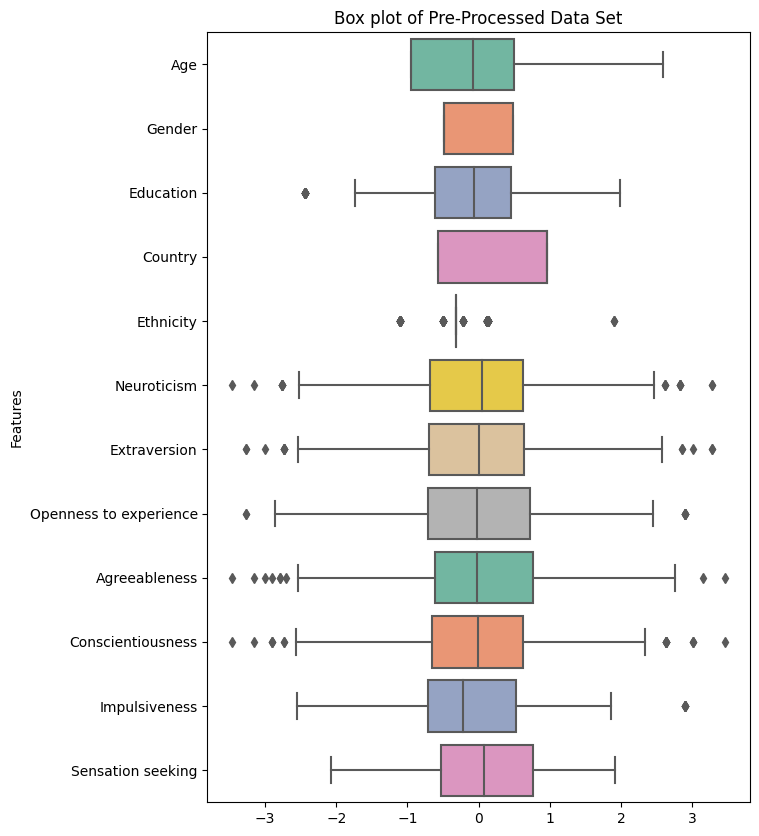

In [10]:
# Data Visualization - Box Plot
fig, ax = plt.subplots(figsize=(7,10))
plt.ylabel("Features")
plt.title("Box plot of Pre-Processed Data Set")
ax = sns.boxplot(data = drugdata[feature_columns], orient="h", palette="Set2")
sns.reset_orig()

In [11]:
# Demographic Data Preparation
demo_data = drugdata.copy()
age = ['18-24' if a <= -0.9 else
       '25-34' if a >= -0.5 and a < 0 else
       '35-44' if a > 0 and a < 1 else
       '45-54' if a > 1 and a < 1.5 else
       '55-64' if a > 1.5 and a < 2 else
       '65+'
       for a in demo_data['Age']]

gender = ['Female' if g > 0 else "Male" for g in demo_data['Gender']]

education = ['Left school before 16 years' if e <-2 else
             'Left school at 16 years' if e > -2 and e < -1.5 else
             'Left school at 17 years' if e > -1.5 and e < -1.4 else
             'Left school at 18 years' if e > -1.4 and e < -1 else
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else
             'University degree' if e > 0 and e < 0.5 else
             'Masters degree' if e > 0.5 and e < 1.5 else
             'Doctorate degree'
             for e in demo_data['Education']]

country = ['USA' if c < -0.5 else
           'New Zealand' if c > -0.5 and c < -0.4 else
           'Other' if c > -0.4 and c < -0.2 else
           'Australia' if c > -0.2 and c < 0 else
           'Ireland' if c > 0 and c < 0.23 else
           'Canada' if c > 0.23 and c < 0.9 else
           'UK'
           for c in demo_data['Country']]

ethnicity = ['Black' if e < -1 else
             'Asian' if e > -1 and e < -0.4 else
             'White' if e > -0.4 and e < -0.25 else
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else
             'Mixed-White/Asian' if e > 0.12 and e < 1 else
             'Mixed-Black/Asian' if e > 1.9 else
             'Other'
             for e in demo_data['Ethnicity']]


demo_data['Age'] = age
demo_data['Gender'] = gender
demo_data['Education'] = education
demo_data['Country'] = country
demo_data['Ethnicity'] = ethnicity

In [12]:
demo_data[demographic_columns].head()

Age  Gender                          Education Country Ethnicity
0  25-34    Male                   Doctorate degree      UK     White
1  35-44    Male  Professional certificate/ diploma      UK     White
2  18-24  Female                     Masters degree      UK     White
3  35-44  Female                   Doctorate degree      UK     White
4    65+  Female            Left school at 18 years  Canada     White

In [13]:
def plot_density(dataset, col, ax, plot_gaussian = True, color="Blue"):
    '''
    Extension of the seaborn histogram that plots, for a given column, an estimated normal distribution (if requested) on top of the fitted data distribution.
    '''
    ncount = len(dataset)

    if plot_gaussian:
        std = dataset[col].std()
        mean = dataset[col].mean()

    #plot histogram using seaborn
    ax = sns.histplot(dataset[col], ax=ax, color=color, kde=True, stat="probability", kde_kws={"bw_adjust":3})

    if plot_gaussian:
        # Limiting our gaussian to the limits from the above plot
        xmin, xmax = ax.get_xlim()
        xnorm = np.arange(xmin, xmax, 0.001)
        ynorm = norm.pdf(xnorm, mean, std)
        ax.plot(xnorm, ynorm, 'r', lw=2)
        ax.legend(["data distribution", "estimated normal distribution"], loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

    ax.set_title(col)
    ax.set_xlabel("")

In [14]:
def plot_pie(dataset, col, ax):
    '''
    Pandas' pie plot wrapper
    '''
    ax = dataset[col].value_counts().plot(kind='pie', ax=ax)
    ax.set_title(col)
    ax.set_ylabel("")

In [15]:
def plot_count(dataset, col, ax, order = None, show_percent=True, rotate_label = True, add_args={"palette": "Set2"}):
    '''
    Extending the seaorn countplot to get frequencies and counts in a pretty way.
    '''

    ncount = len(dataset)

    if order is None:
        order = np.sort(dataset[col].unique())

    # plot seaborn countplot
    ax = sns.countplot(data=dataset, x=col, ax=ax, order=order, **add_args)

    # Get y limit (number of elements)
    _ ,max_nb = ax.get_ylim()
    # Transform this limit into a frequency in [0, 100]
    freq_lim = (max_nb * 100/ ncount)

    # Duplicate the ax
    ax2 = ax.twinx()

    #Move duplicate y axis ticks to the left
    ax2.yaxis.tick_left()

    #Move original y axis ticks to the right
    ax.yaxis.tick_right()

    # Swap the label positions to match the ticks
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # We want to write the frequency on top of each bar
    if show_percent:
        # for every bar
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            if not math.isnan(x.mean()) and not math.isnan(y):
                # Write frequency at an x and y coordinate
                ax.text(x.mean(), y, '{:.1f}%'.format(100.*y/ncount),
                    ha='center', va='bottom')

    # Set y axis limit for counts and frequencies
    ax2.set_ylim(0,freq_lim)
    ax.set_ylim(0,max_nb)

    # set ticks for count
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    ax.yaxis.set_tick_params(which="major")

    # set ticks for frequencies
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(freq_lim/10))
    ax2.yaxis.set_tick_params(which="major")

    # remove grid for ax 2 (keep only ax)
    ax2.grid(False)
    ax.grid(False)
    ax.set_xlabel("")
    if rotate_label:
        # rotate tick labels on the x axis / / /
        _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(col)

In [16]:
def plot(kind, dataset, columns=None, fig_title="Count/Frequency plots", fontsizes = 20, **kwargs):
    '''
    Wrapper function that takes care of plot wise sizes and calling the wanted procedure
    '''

    # plot choices
    kind_dict = {
        'pie': plot_pie,
        'count': plot_count,
        'density': plot_density}

    if kind not in kind_dict:
        raise ValueError(f"{kind} is not a valid kind, has to be one of {kind_dict.keys()}")

    if columns is None:
        # us all dataset columns
        columns = list(dataset.columns)

    fig = None

    # Setting font sizes
    plt.rc('xtick', labelsize=fontsizes*1.5)
    plt.rc('ytick', labelsize=fontsizes*1.5)
    plt.rc('axes', labelsize=fontsizes*2)
    plt.rc('legend', fontsize=fontsizes*1.5, title_fontsize=0)
    plt.rc('axes', titlesize=2*fontsizes)
    plt.rc('font', size=1.7*fontsizes)

    # Scale of the figure in ax (to be used later)
    figsize_scale = fontsizes

    if not isinstance(columns, list):
        # columns has to be a list
        if isinstance(columns, str):
            columns = [columns]
        else:
            columns = list(columns)

    if len(columns) == 1: # Only variable to plot
        ncols, nrows = 1, 1
        figsize_scale *= 2 # double figsize
    else:
        ncols, nrows = 2, math.ceil(len(columns) / 2)

    fig, axes = plt.subplots(figsize=(figsize_scale*ncols, figsize_scale*nrows), nrows=nrows, ncols=ncols)

    if ncols == 1 and nrows == 1:
        # We need a list of axes
        axes = np.array([axes])

    # Plot
    do_plots(dataset, columns, axes, kind_dict[kind], **kwargs)

    fig.suptitle(fig_title + "\n\n", fontsize=fontsizes*2.5)
    plt.tight_layout()
    #Reset plot setting to original
    sns.reset_orig()

def do_plots(dataset, columns, axes, plot_func, **kwargs):
    '''
    Calls the plotting function on every axis and removes unused axes.
    '''
    axes = axes.flat

    #plot every variable
    for index, col in enumerate(columns):
        plot_func(dataset, col, axes[index], **kwargs)

    # remove empty axes
    for empty in range(len(columns), len(axes)):
        axes[empty].axis("off")

Data Visualization - Pie and Count Plots

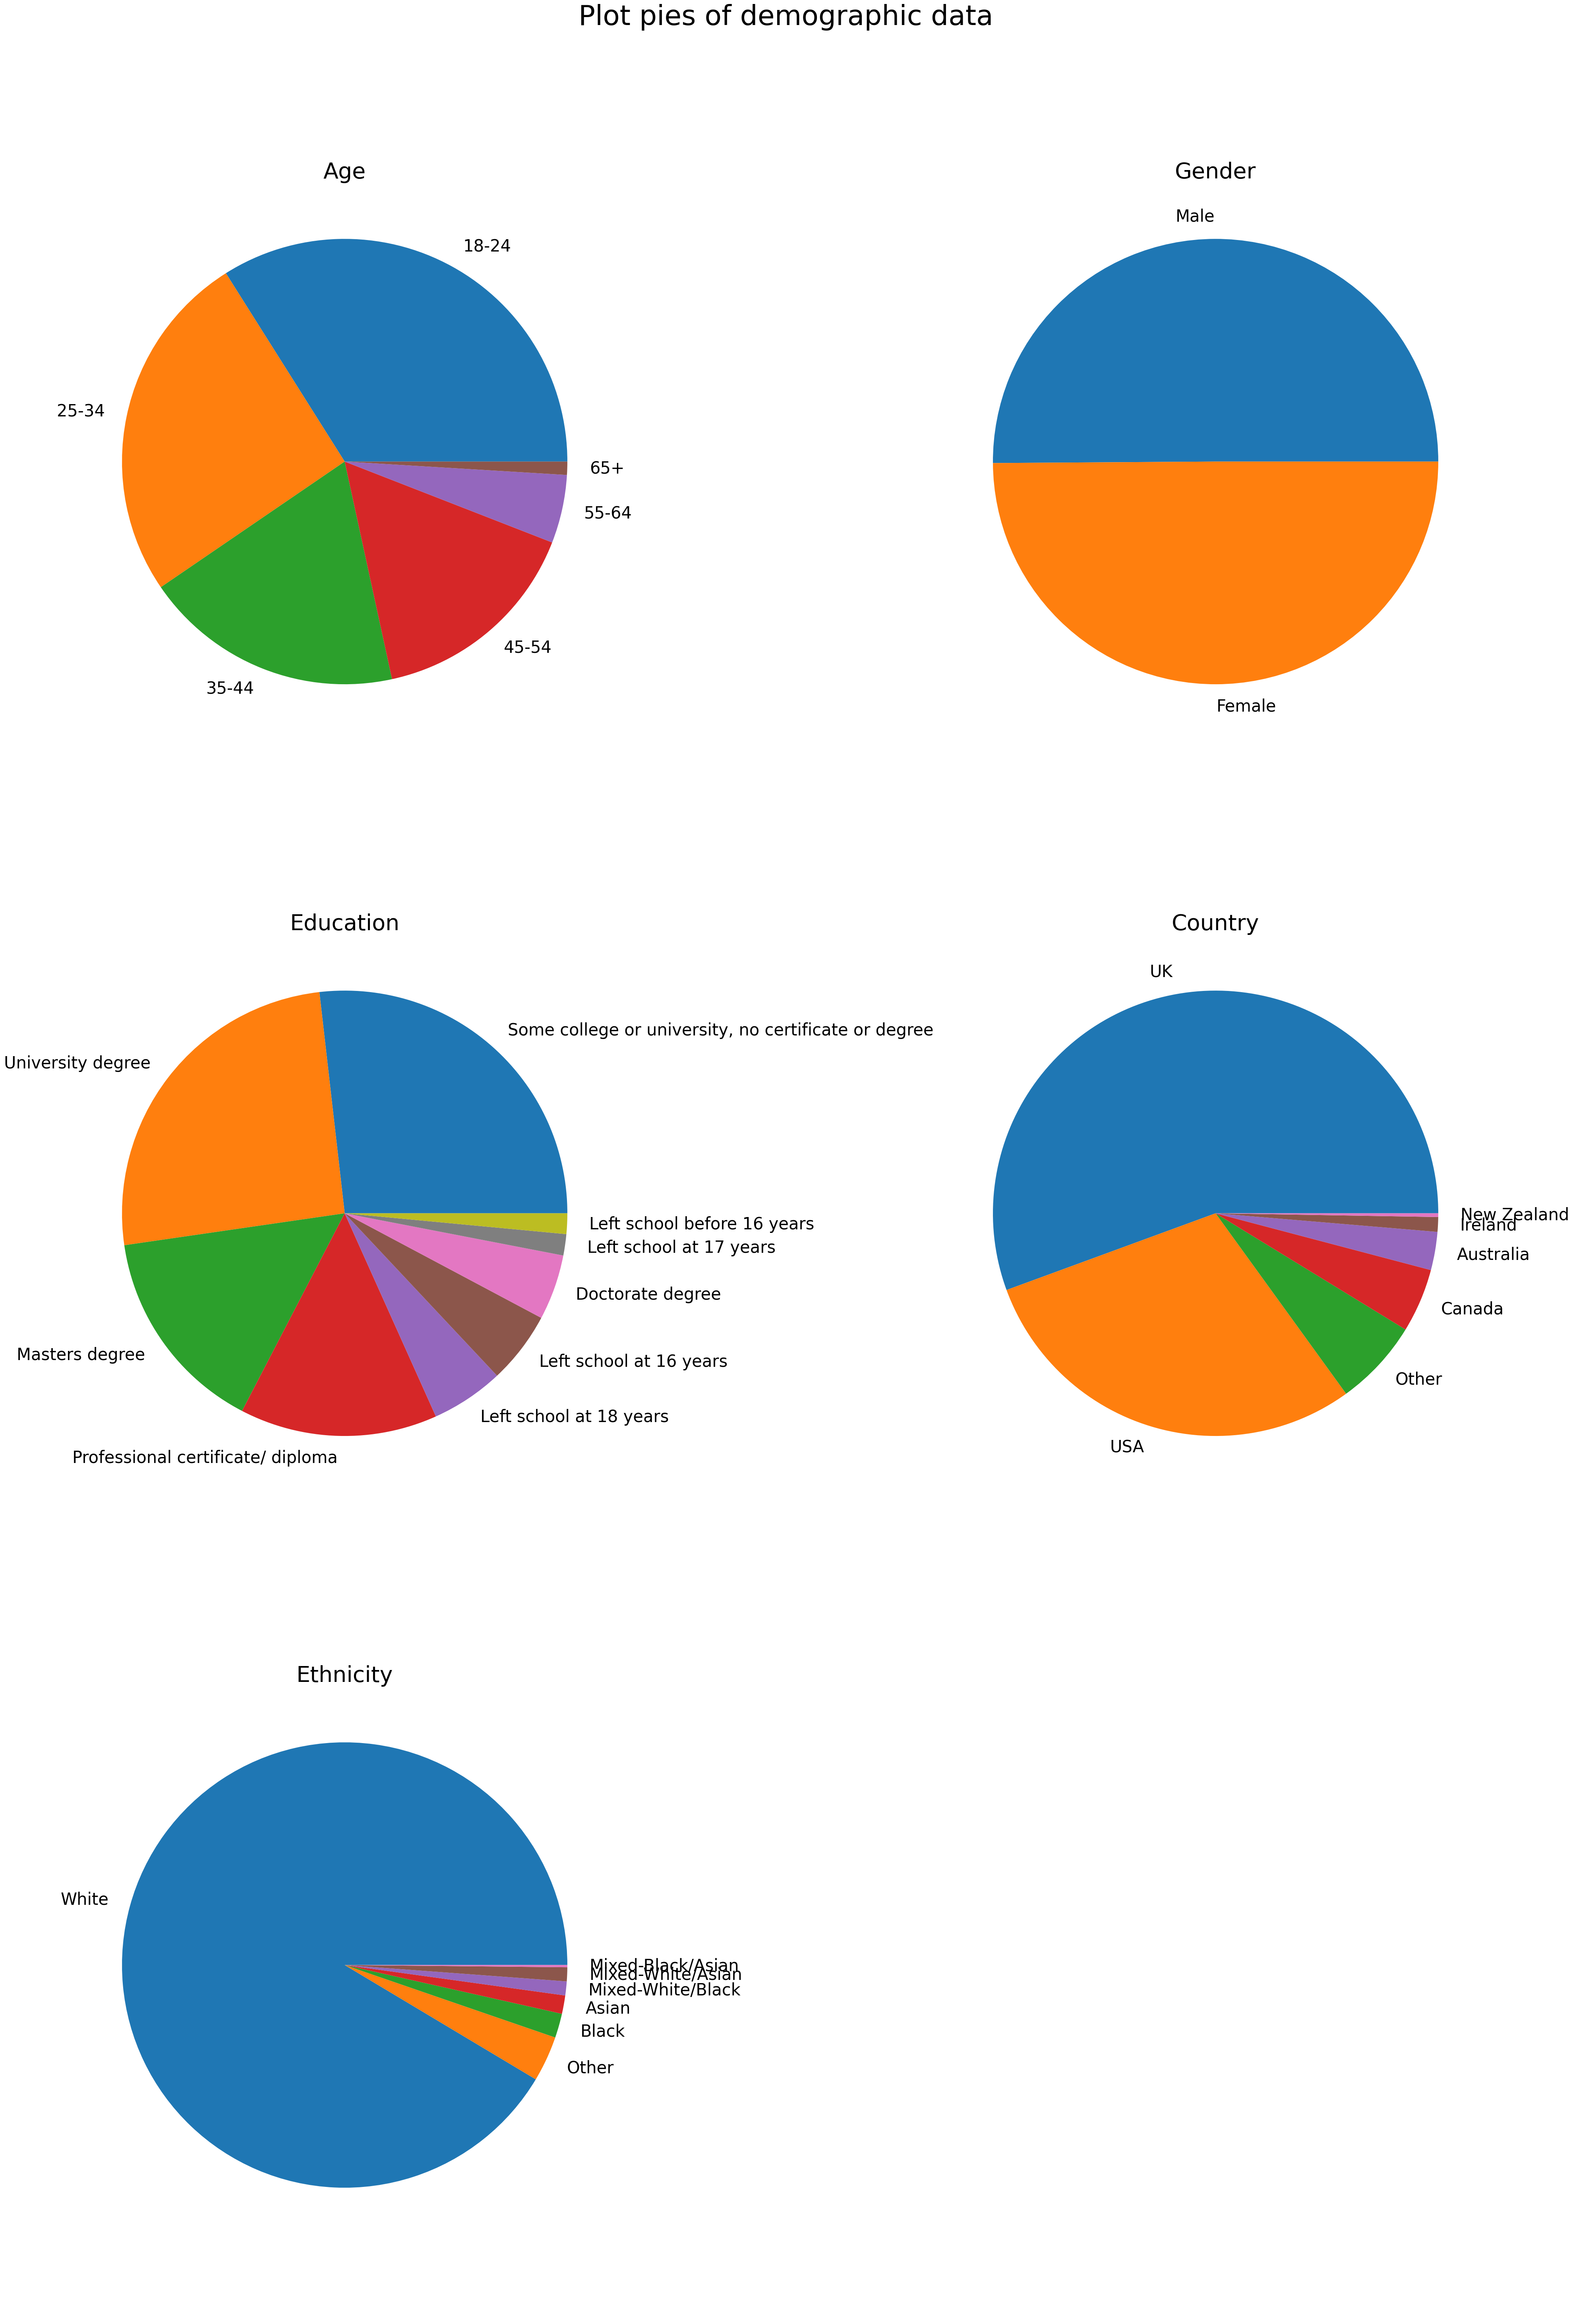

In [17]:
plot("pie", demo_data, demographic_columns, fig_title="Plot pies of demographic data")

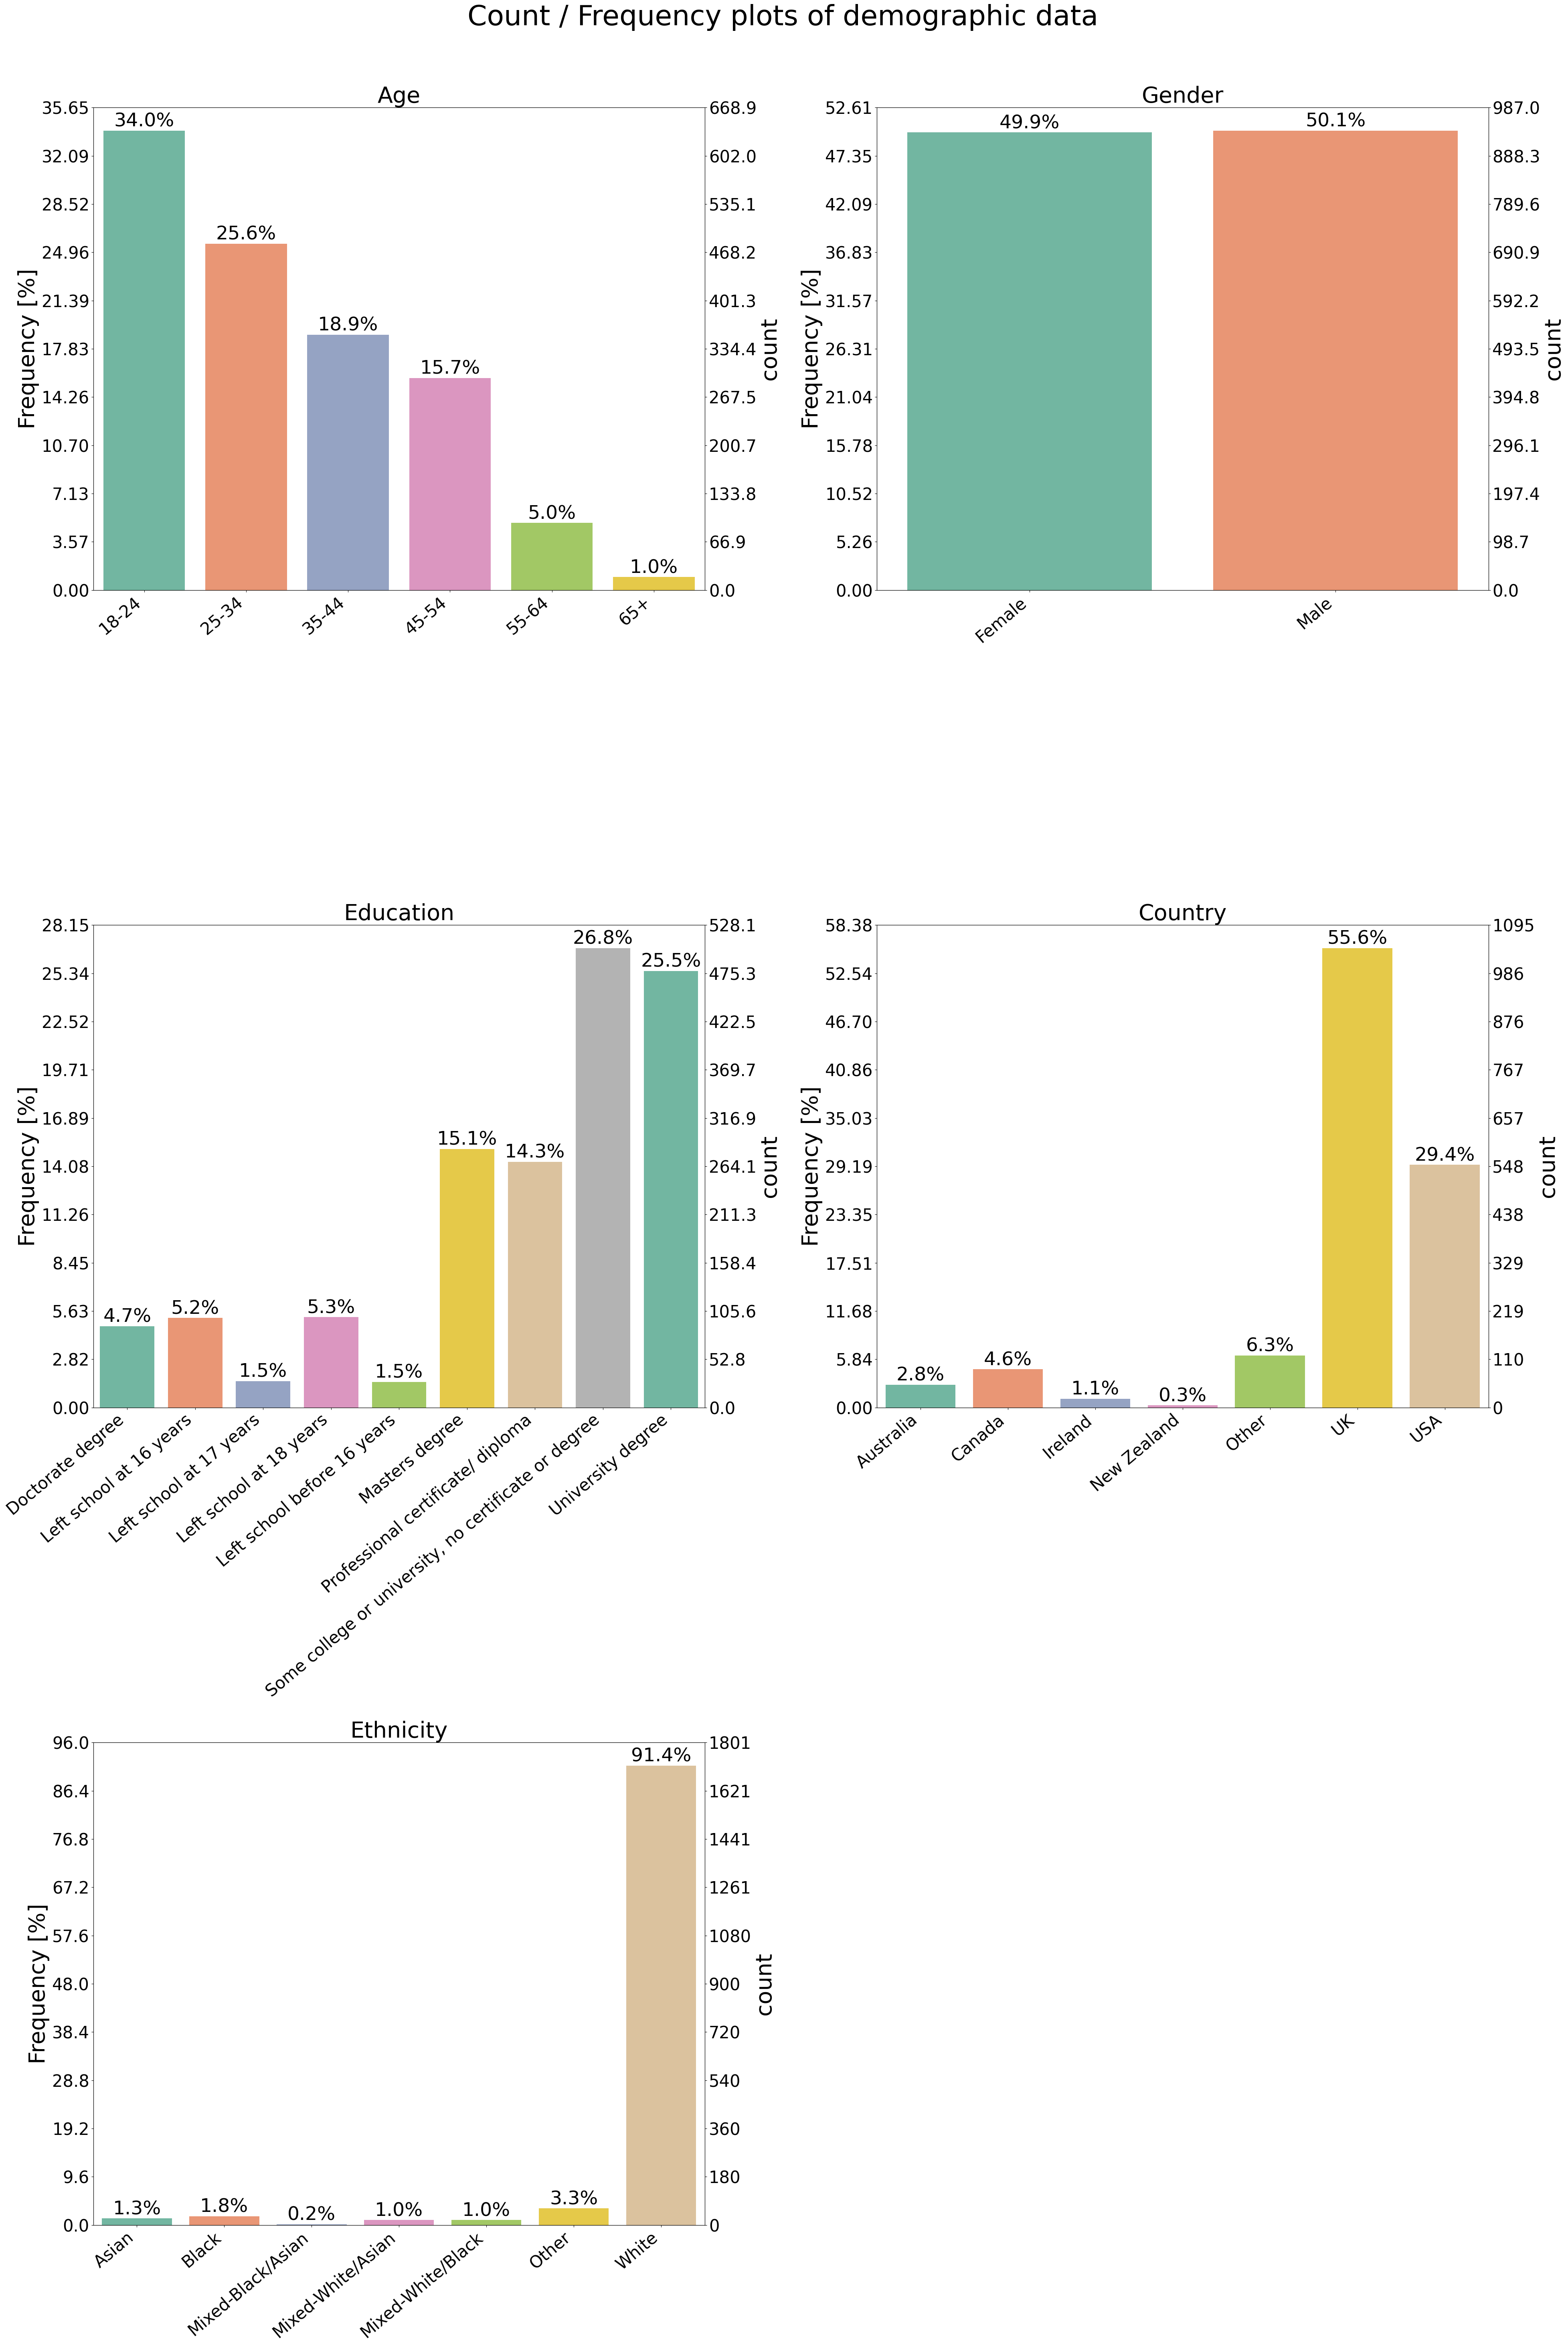

In [18]:
plot("count", demo_data, demographic_columns, fig_title="Count / Frequency plots of demographic data")

In [19]:
#The function below creates a dataframe with count and frequencies for a given column.
def value_counts_percentage(dataset, column):
    ''' value.counts() method extended by displaying percentage '''

    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100

    return pd.concat([a,b.round(2)], axis=1, keys=['N', '%'])

Statistical Analysis and Data Transformation

In [20]:
value_counts_percentage(demo_data, 'Age')

N      %
18-24  637  33.96
25-34  480  25.59
35-44  354  18.87
45-54  294  15.67
55-64   93   4.96
65+     18   0.96

In [21]:
value_counts_percentage(demo_data, 'Gender')

N      %
Male    940  50.11
Female  936  49.89

In [22]:
value_counts_percentage(demo_data, 'Education')

N      %
Some college or university, no certificate or d...  503  26.81
University degree                                   478  25.48
Masters degree                                      283  15.09
Professional certificate/ diploma                   269  14.34
Left school at 18 years                              99   5.28
Left school at 16 years                              98   5.22
Doctorate degree                                     89   4.74
Left school at 17 years                              29   1.55
Left school before 16 years                          28   1.49

In [23]:
value_counts_percentage(demo_data, 'Country')

N      %
UK           1043  55.60
USA           551  29.37
Other         118   6.29
Canada         87   4.64
Australia      52   2.77
Ireland        20   1.07
New Zealand     5   0.27

In [24]:
value_counts_percentage(demo_data, 'Ethnicity')

N      %
White              1715  91.42
Other                62   3.30
Black                33   1.76
Asian                25   1.33
Mixed-White/Black    19   1.01
Mixed-White/Asian    19   1.01
Mixed-Black/Asian     3   0.16

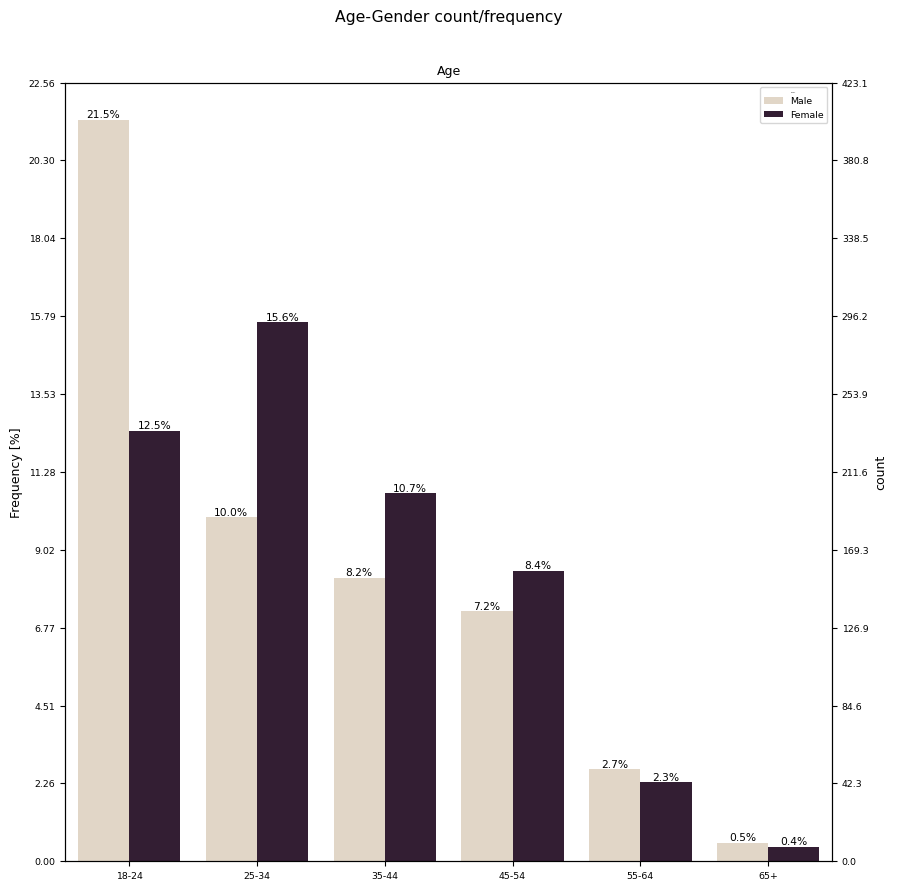

In [25]:
plot("count", demo_data, 'Age', fig_title="Age-Gender count/frequency", rotate_label=False, add_args={"hue":"Gender", "palette":'ch:.25'}, fontsizes=4.5);

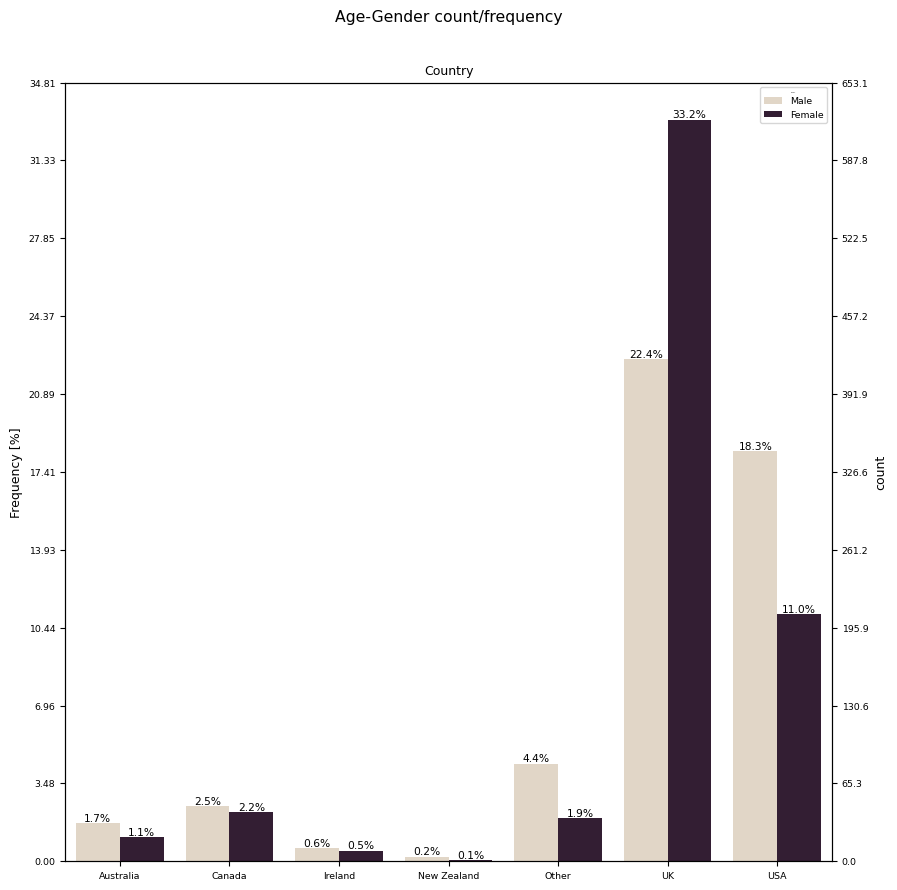

In [26]:
plot("count", demo_data, 'Country', fig_title="Age-Gender count/frequency", rotate_label=False, add_args={"hue":"Gender", "palette":'ch:.25'}, fontsizes=4.5);

In [27]:
drug_data = drugdata[drugs_columns]

In [28]:
plot("count", drug_data, fig_title="Count / Frequency for drug consumption\n\n", rotate_label=False)

In [29]:
# Normalization for PCA analysis
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Fitting only on training and test data
drugnorm = scale.fit_transform(drugdata)

In [30]:
drugnorm

array([[-0.13192388, -0.99787007,  2.09018718, ..., -0.80781695,
         0.33298235, -0.44795506],
       [ 0.52434968, -0.99787007, -0.06133365, ..., -0.12239651,
        -1.32288217, -0.44795506],
       [-1.12635333,  1.00213447,  1.22611718, ..., -0.80781695,
        -0.49494991, -0.44795506],
       ...,
       [-0.13192388,  1.00213447,  0.47969975, ...,  0.56302393,
         1.16091461, -0.44795506],
       [-1.12635333,  1.00213447, -0.64240577, ...,  1.24844437,
         0.33298235, -0.44795506],
       [-1.12635333, -0.99787007, -0.64240577, ...,  1.24844437,
         1.16091461,  1.63731465]])

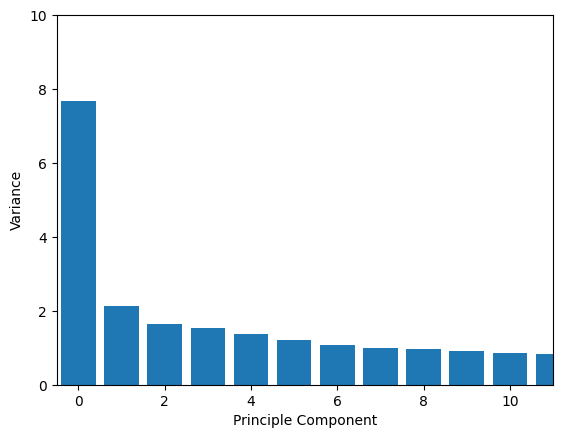

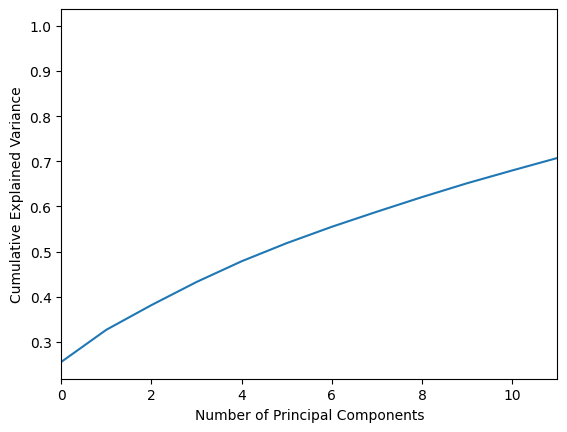

In [31]:
#PRINCIPAL COMPONENT ANALYSIS
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=30)
pca.fit(drugnorm)

# Plot explained variance
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('Principle Component')
plt.ylabel('Variance')
plt.xlim([-0.5, 11])
plt.ylim([0, 10])
plt.savefig('pca1.png')
plt.show()

# Plot cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 11, emit=True)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('pca2.png')
plt.show()

In [32]:
drugnorm = pd.DataFrame(drugnorm)

In [33]:
import warnings
warnings.filterwarnings("ignore")
#Preparing for test and Train Data
Xs = drugnorm.iloc[:,:-1]
ys = drugnorm.iloc[:,-1]

Ridge Regression Error: 0.18969


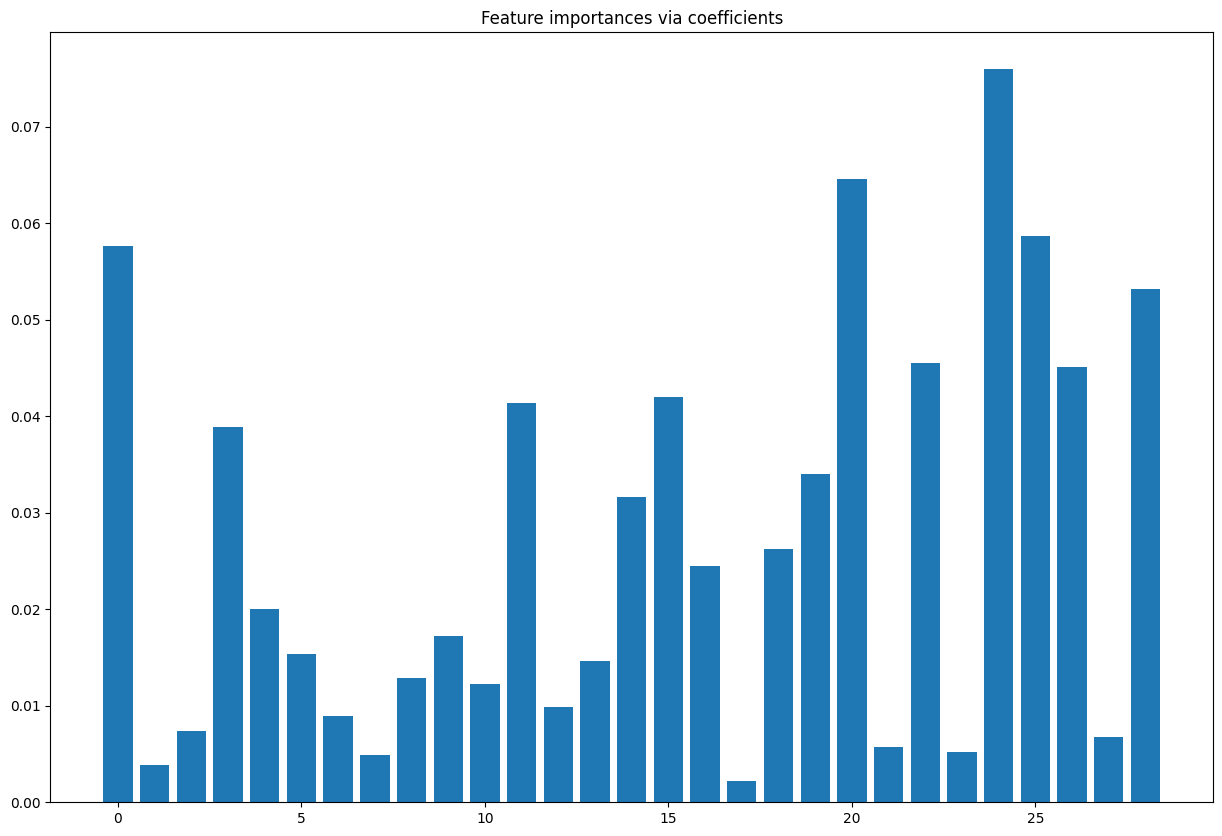

In [34]:
# Feature Importance Analysis with Ridge Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeCV # RidgeCV = GridSearchCV + Ridge (for regression)


ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(Xs, ys)
print("Ridge Regression Error: %.5f" % (ridge.score(Xs, ys)))

importance = np.abs(ridge.coef_)
feature_names = np.array(Xs.columns)
plt.figure(figsize = (15,10))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

Correlation Analysis and Heatmap Visualization

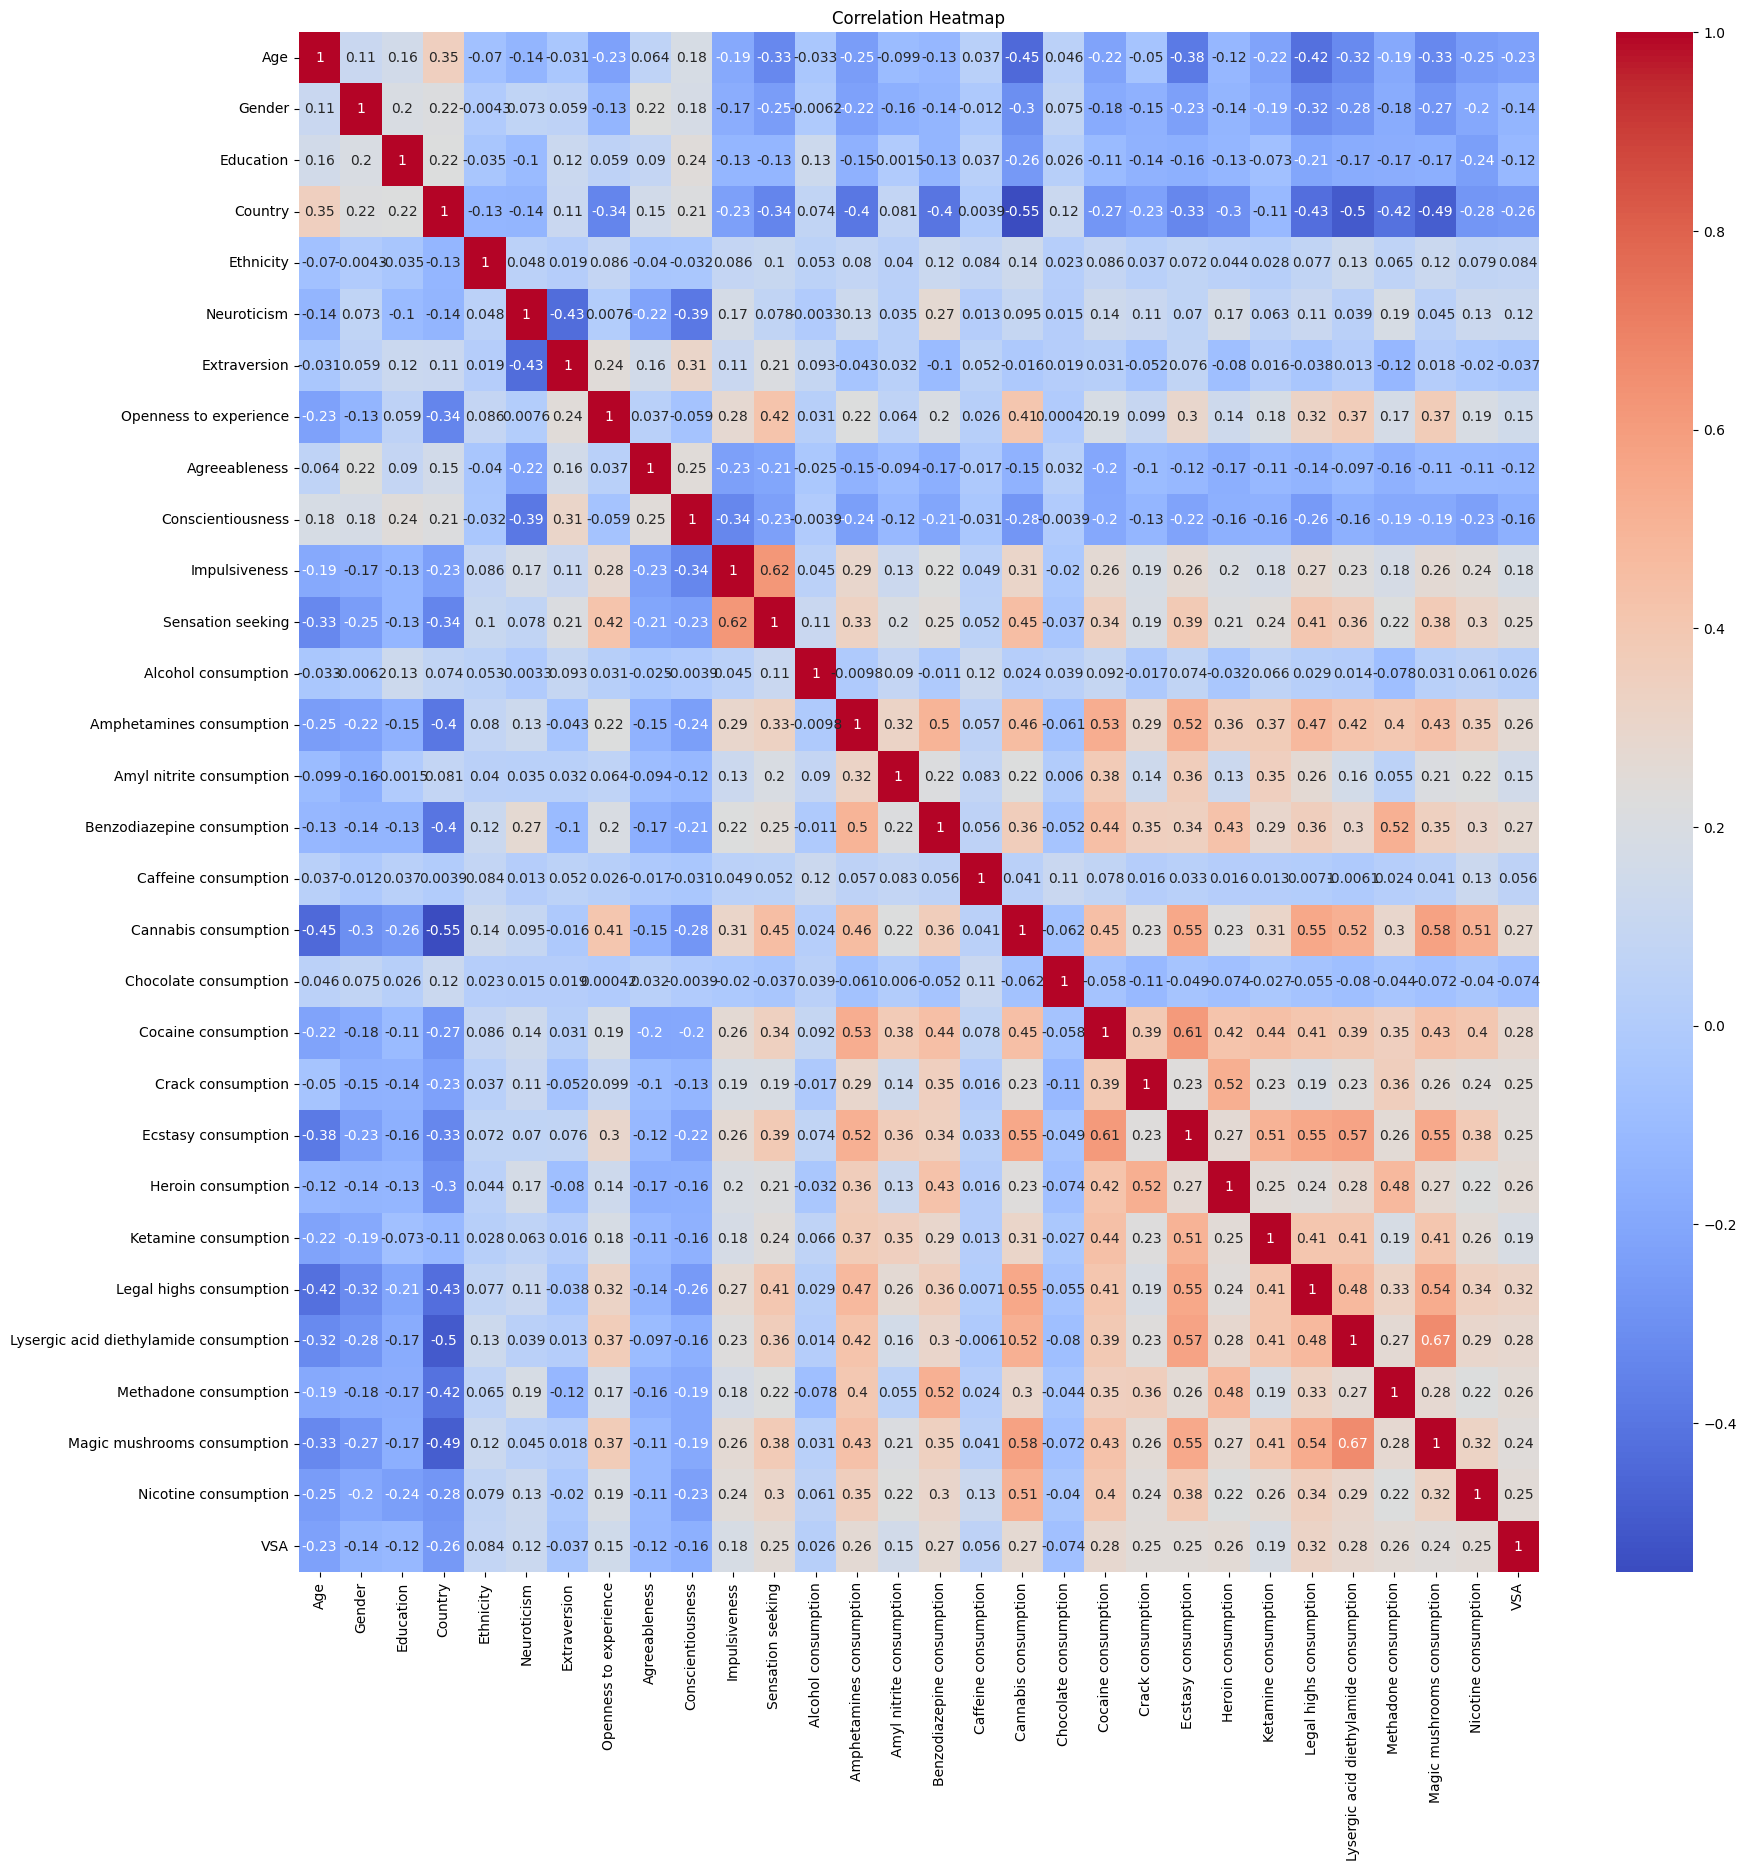

Index(['VSA', 'Legal highs consumption',
       'Lysergic acid diethylamide consumption', 'Cocaine consumption',
       'Benzodiazepine consumption', 'Cannabis consumption',
       'Amphetamines consumption', 'Country', 'Methadone consumption',
       'Heroin consumption', 'Nicotine consumption', 'Sensation seeking',
       'Crack consumption', 'Ecstasy consumption',
       'Magic mushrooms consumption', 'Age', 'Ketamine consumption',
       'Impulsiveness', 'Conscientiousness', 'Amyl nitrite consumption',
       'Openness to experience', 'Gender', 'Neuroticism', 'Education',
       'Agreeableness', 'Ethnicity', 'Chocolate consumption',
       'Caffeine consumption', 'Extraversion', 'Alcohol consumption'],
      dtype='object')
[1.         0.31836683 0.28328508 0.27971986 0.27234468 0.26955662
 0.26475364 0.26403993 0.25849877 0.25550081 0.25499436 0.24975611
 0.24903335 0.24799278 0.24230498 0.22705838 0.18872683 0.18272806
 0.16199671 0.15287317 0.1499197  0.13687751 0.11704768 0.115

In [35]:
correlation_matrix = drugdata.corr()

# Create heatmap
plt.figure(figsize = (20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()
print(drugdata.corr().abs().nlargest(30,'VSA').index)
print(drugdata.corr().abs().nlargest(30,'VSA').values[:,29])

#selecting the top 5

In [36]:
drugdata

Age   Gender  Education  Country  Ethnicity  Neuroticism  \
0    -0.07854 -0.48246    1.98437  0.96082   -0.31685     -0.67825   
1     0.49788 -0.48246   -0.05921  0.96082   -0.31685     -0.46725   
2    -0.95197  0.48246    1.16365  0.96082   -0.31685     -0.14882   
3     0.49788  0.48246    1.98437  0.96082   -0.31685      0.73545   
4     2.59171  0.48246   -1.22751  0.24923   -0.31685     -0.67825   
...       ...      ...        ...      ...        ...          ...   
1871 -0.95197  0.48246   -0.61113 -0.57009   -0.31685     -1.19430   
1872 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685     -0.24649   
1873 -0.07854  0.48246    0.45468 -0.57009   -0.31685      1.13281   
1874 -0.95197  0.48246   -0.61113 -0.57009   -0.31685      0.91093   
1875 -0.95197 -0.48246   -0.61113  0.21128   -0.31685     -0.46725   

      Extraversion  Openness to experience  Agreeableness  Conscientiousness  \
0          1.93886                 1.43533        0.76096           -0.14277   
1          0.80523                -0.84732       -1.62090           -1.01450   
2         -0.80615                -0.01928        0.59042            0.58489   
3         -1.63340                -0.45174       -0.30172            1.30612   
4         -0.30033                -1.55521        2.03972            1.63088   
...            ...                     ...            ...                ...   
1871       1.74091                 1.88511        0.76096           -1.13788   
1872       1.74091                 0.58331        0.76096           -1.51840   
1873      -1.37639                -1.27553       -1.77200           -1.38502   
1874      -1.92173                 0.29338       -1.62090           -2.57309   
1875       2.12700                 1.65653        1.11406            0.41594   

      ...  Crack consumption  Ecstasy consumption  Heroin consumption  \
0     ...                  0                    4                   0   
1     ...                  0                    0                   0   
2     ...                  0                    0                   0   
3     ...                  0                    1                   0   
4     ...                  0                    0                   0   
...   ...                ...                  ...                 ...   
1871  ...                  0                    0                   0   
1872  ...                  0                    2                   0   
1873  ...                  0                    4                   0   
1874  ...                  0                    3                   0   
1875  ...                  0                    3                   0   

      Ketamine consumption  Legal highs consumption  \
0                        2                        0   
1                        0                        0   
2                        2                        0   
3                        0                        1   
4                        0                        0   
...                    ...                      ...   
1871                     0                        3   
1872                     0                        3   
1873                     2                        0   
1874                     0                        3   
1875                     0                        3   

      Lysergic acid diethylamide consumption  Methadone consumption  \
0                                          2                      3   
1                                          0                      0   
2                                          0                      0   
3                                          0                      0   
4                                          0                      0   
...                                      ...                    ...   
1871                                       3                      0   
1872                                       5                      4   
1873                           

In [37]:
drugg=drugdata.copy()

In [38]:
new_data=drugg.drop(columns=[ 'Alcohol consumption','Extraversion','Caffeine consumption','Chocolate consumption','Ethnicity','Agreeableness','Education','Neuroticism','Gender','Openness to experience','Amphetamines consumption','Country', 'Methadone consumption', 'Heroin consumption', 'Nicotine consumption', 'Sensation seeking', 'Crack consumption', 'Ecstasy consumption','Magic mushrooms consumption', 'Age', 'Ketamine consumption', 'Impulsiveness', 'Conscientiousness', 'Amyl nitrite consumption', 'Openness to experience','Gender', 'Neuroticism', 'Education', 'Agreeableness', 'Ethnicity', 'Caffeine consumption','Ecstasy consumption', 'Alcohol consumption'],axis=1)

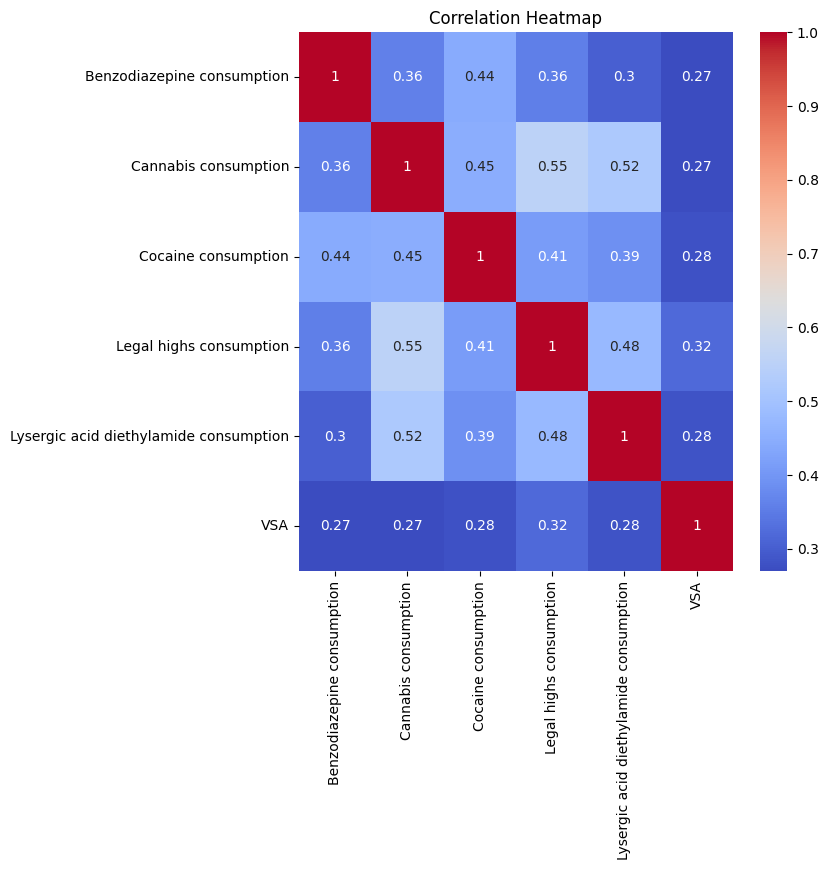

Index(['VSA', 'Legal highs consumption',
       'Lysergic acid diethylamide consumption', 'Cocaine consumption',
       'Benzodiazepine consumption', 'Cannabis consumption'],
      dtype='object')
[0.11704768 0.1123953  0.03907126 0.13887489 0.27221351 0.09465103]


In [39]:
correlation_matrix = new_data.corr()

# Create heatmap
plt.figure(figsize = (7,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()
print(drugdata.corr().abs().nlargest(6,'VSA').index)
print(drugdata.corr().abs().nlargest(6,'VSA').values[:,5])

Reclassifying the feature into 0 and 1, including the target variable

In [40]:
new_data.replace({2:1,3:1,4:1,5:1,6:1, 7: 1}, inplace=True)

In [41]:
new_data.head()

Benzodiazepine consumption  Cannabis consumption  Cocaine consumption  \
0                           0                     1                    1   
1                           0                     1                    0   
2                           1                     1                    1   
3                           0                     1                    0   
4                           0                     0                    0   

   Legal highs consumption  Lysergic acid diethylamide consumption  VSA  
0                        0                                       1    0  
1                        0                                       0    0  
2                        0                                       0    0  
3                        1                                       0    0  
4                        0                                       0    0

Data Preparation for Machine Learning Models

In [42]:
#Preparing for test and Train Data
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [43]:
print(X.shape)
print(y.shape)

(1876, 5)
(1876,)


Machine Learning Model Training and Evaluation

In [44]:
#data splitting for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
# Normalization for processing
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Fitting only on training and test data
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [46]:
from sklearn.gaussian_process.kernels import RBF

In [47]:
from sklearn.gaussian_process import GaussianProcessClassifier
kernel = 1.0 * RBF(1.0)
gp_clf =  GaussianProcessClassifier(kernel=kernel)
gp_clf.fit(X_train, y_train)
print("GaussianProcessClassifier accuracy: %.2f%%" % (100*gp_clf.score(X_test, y_test)))

GaussianProcessClassifier accuracy: 80.32%


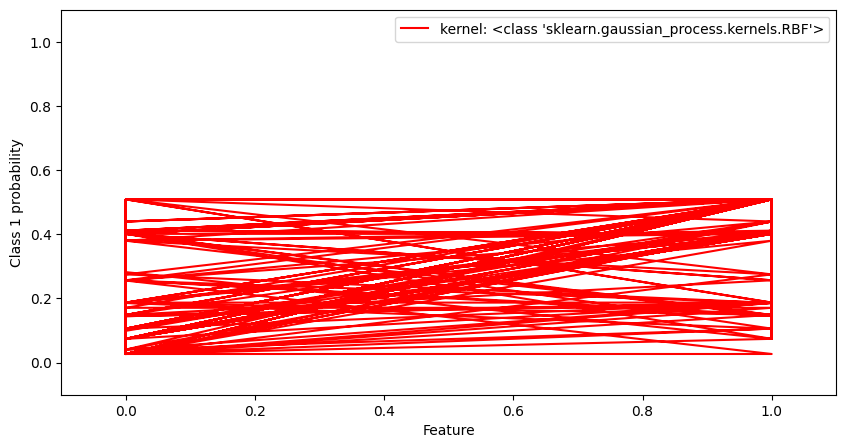

In [48]:
#Plot posteriors
plt.figure(figsize = (10,5))
plt.plot(
    y_test,
    gp_clf.predict_proba(X_test[:len(X_test)])[:, 1],
    "r",
    label="kernel: %s" % RBF,
    )

plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.legend(loc="best")
plt.show()

**Gaussian Process Classifier Visualization and Analysis**

Learned kernel: 20.2**2 * DotProduct(sigma_0=4.73) ** 2 


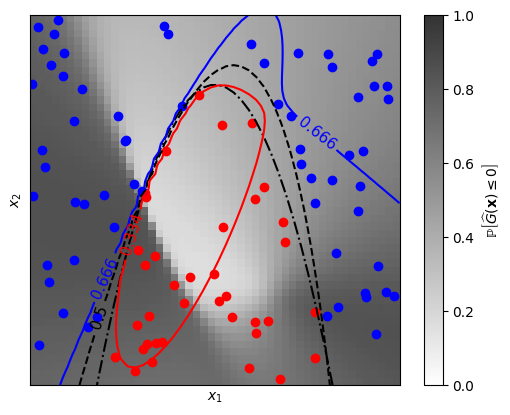

In [49]:
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct

# A few constants
lim = 8

def g(x):
    """The function to predict (classification will then consist in predicting
    whether g(x) <= 0 or not)"""
    return 5.0 - x[:, 1] - 0.5 * x[:, 0] ** 2.0

# Generate some example data
np.random.seed(42)
X = np.random.uniform(low=-lim, high=lim, size=(100, 2))
y = (g(X) <= 0).astype(int)

# Instantiate and fit Gaussian Process Model
kernel = C(0.1, (1e-5, np.inf)) * DotProduct(sigma_0=0.1) ** 2
gp = GaussianProcessClassifier(kernel=kernel)
gp.fit(X, y)
print("Learned kernel: %s " % gp.kernel_)

# Evaluate real function and the predicted probability
res = 50
x1, x2 = np.meshgrid(np.linspace(-lim, lim, res), np.linspace(-lim, lim, res))
xx = np.vstack([x1.reshape(x1.size), x2.reshape(x2.size)]).T

y_true = g(xx)
y_prob = gp.predict_proba(xx)[:, 1]
y_true = y_true.reshape((res, res))
y_prob = y_prob.reshape((res, res))

# Plot the probabilistic classification iso-values
fig, ax = plt.subplots()
ax.axes.set_aspect("equal")
plt.xticks([])
plt.yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

cax = plt.imshow(y_prob, cmap=cm.gray_r, alpha=0.8, extent=(-lim, lim, -lim, lim))
norm = plt.matplotlib.colors.Normalize(vmin=0.0, vmax=0.9)
cb = plt.colorbar(cax, ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], norm=norm)
cb.set_label(r"${\rm \mathbb{P}}\left[\widehat{G}(\mathbf{x}) \leq 0\right]$")
plt.clim(0, 1)

plt.plot(X[y <= 0, 0], X[y <= 0, 1], "r.", markersize=12)
plt.plot(X[y > 0, 0], X[y > 0, 1], "b.", markersize=12)

plt.contour(x1, x2, y_true, [0.0], colors="k", linestyles="dashdot")

cs = plt.contour(x1, x2, y_prob, [0.666], colors="b", linestyles="solid")
plt.clabel(cs, fontsize=11)

cs = plt.contour(x1, x2, y_prob, [0.5], colors="k", linestyles="dashed")
plt.clabel(cs, fontsize=11)

cs = plt.contour(x1, x2, y_prob, [0.334], colors="r", linestyles="solid")
plt.clabel(cs, fontsize=11)

plt.show()


**Decision Tree, Logistic Regression, and SVM Models**

In [55]:
#run again with entropy to check for better result using the best given parameters above
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=2, min_impurity_decrease=0.1)
dt_clf.fit(X_train, y_train)
print("Decision Tree accuracy: %.2f%%" % (100*dt_clf.score(X_test, y_test)))

# Decision Tree predictions (assuming you have these as `dt_pred`)
dt_pred = dt_clf.predict(X_test)

# Calculating metrics
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1_score = f1_score(y_test, dt_pred)

print(f"Decision Tree Precision: {dt_precision:.2f}")
print(f"Decision Tree Recall: {dt_recall:.2f}")
print(f"Decision Tree F1 Score: {dt_f1_score:.2f}")


Decision Tree accuracy: 78.99%
Decision Tree Precision: 0.00
Decision Tree Recall: 0.00
Decision Tree F1 Score: 0.00


In [51]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(penalty='l2', C=1.0)
lg_clf.fit(X_train, y_train)
print("Logistic Regression accuracy: %.2f%%" % (100*lg_clf.score(X_test, y_test)))

from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression predictions
lg_pred = lg_clf.predict(X_test)

# Calculating metrics
lg_precision = precision_score(y_test, lg_pred)
lg_recall = recall_score(y_test, lg_pred)
lg_f1_score = f1_score(y_test, lg_pred)

print(f"Logistic Regression Precision: {lg_precision:.2f}")
print(f"Logistic Regression Recall: {lg_recall:.2f}")
print(f"Logistic Regression F1 Score: {lg_f1_score:.2f}")


Logistic Regression accuracy: 80.32%
Logistic Regression Precision: 0.54
Logistic Regression Recall: 0.42
Logistic Regression F1 Score: 0.47


In [56]:
#using svm.SVC this time around
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: %.2f%%" % (100*accuracy))

# SVM predictions (assuming you have these as `svm_pred`)
svm_pred = clf.predict(X_test)

# Calculating metrics
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)

print(f"SVM Precision: {svm_precision:.2f}")
print(f"SVM Recall: {svm_recall:.2f}")
print(f"SVM F1 Score: {svm_f1_score:.2f}")


SVM Accuracy: 78.99%
SVM Precision: 0.00
SVM Recall: 0.00
SVM F1 Score: 0.00


**Naive Bayes Model Implementation and Evaluation**

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf = gnb_clf.fit(X_train, y_train)
gnb_clf = gnb_clf.score(X_test,y_test)

# Creating and training the Naive Bayes classifier
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

# Making predictions
gnb_pred = gnb_clf.predict(X_test)

# Calculating the accuracy score
gnb_accuracy = gnb_clf.score(X_test, y_test)
print("GNB Accuracy: %.2f%%" % (100 * gnb_accuracy))

# Calculating precision, recall, and F1 score
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_f1_score = f1_score(y_test, gnb_pred)

print(f"Naive Bayes Precision: {gnb_precision:.2f}")
print(f"Naive Bayes Recall: {gnb_recall:.2f}")
print(f"Naive Bayes F1 Score: {gnb_f1_score:.2f}")

GNB Accuracy: 75.27%
Naive Bayes Precision: 0.44
Naive Bayes Recall: 0.71
Naive Bayes F1 Score: 0.55


In [54]:
# Execution Time Calculation
sp = time.time()
time_taken = (sp-st)/60
print("time_taken is: %0.1f Minutes" % (time_taken))

time_taken is: 1.2 Minutes
